# Prolexitim Analytics 
## TAS-20 Data. Descriptive and Correlational Analysis
### Dataset from Prolexitim TAS-20 Spain instrument
<hr>
May 2019.<br> Prolexitim dataset version 1.1 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>

### This notebook contains: 

- TAS-20 Dataset loading. 
- TAS-20 Dataset categorical variable definition
- TAS-20 Dataset export. 
- TAS-20 Data Descriptive Analysis
- TAS-20 Data Probability Distribution Analysis
- TAS-20 Data Correlational Analysis

## Loading TAS-20 dataset

In [168]:
import pandas as pd 
from scipy import stats
import seaborn as sns

tas_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-tas-1.1.csv"

tas_df = pd.read_csv(tas_dataset_path,header=0,delimiter="\t") 

In [172]:
# Check
# tas_df.count()
tas_df = tas_df.drop(columns="Unnamed: 0");

In [173]:
tas_df.head()

,NLP,Code,TAS20,F1,F2,F3,Tas20Time,Sex,Gender,Age,Dhand,Studies,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job
0,0,be8f0c722d0a0f4cd9d92c503e6f7583,42,16,10,16,254305,1,1,21,1,5,2,6,2,ES,ES,-1,Iberic,Psychology
1,1,608af5455da8c250a87f81a5ed5c1942,55,15,20,15,103425,1,1,42,2,7,2,5,5,ES,ES,-1,Iberic,Psychology
2,1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,201637,2,2,22,1,5,2,2,2,ES,ES,-1,Iberic,Psychology
3,0,a2caa2eaccf99705bf39f6aeaee00ee3,40,13,10,17,242202,2,2,22,1,5,2,3,1,ES,ES,-1,Iberic,Psychology
4,1,20cd825cadb95a71763bad06e142c148,40,12,10,18,155945,2,2,22,1,5,2,1,1,ES,ES,-1,Iberic,Psychology


In [161]:
# tas_df.dtypes

In [174]:
# Make sure to have propper categorial variables. 

tas_df['Sex'] = pd.Categorical(tas_df['Sex'])
tas_df['Gender'] = pd.Categorical(tas_df['Gender'])
tas_df['Dhand'] = pd.Categorical(tas_df['Dhand'])
tas_df['Studies'] = pd.Categorical(tas_df['Studies'])
tas_df['SClass'] = pd.Categorical(tas_df['SClass'])
tas_df['SibPos'] = pd.Categorical(tas_df['SibPos'])

In [163]:
# tas_df.dtypes

## Descriptive Analysis

In [175]:
tas_df.describe()

,NLP,TAS20,F1,F2,F3,Tas20Time,Age,Siblings,Rtime
count,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02,122.000000,122.000000,122.000000
mean,0.647541,45.016393,15.573770,12.696721,16.655738,2.664435e+05,34.942623,2.622951,0.909836
std,0.479706,10.101128,4.837727,4.195411,3.928641,2.169045e+05,12.459056,1.356514,7.425669
min,0.000000,25.000000,7.000000,5.000000,7.000000,1.152700e+04,13.000000,1.000000,-1.000000
25%,0.000000,38.000000,12.000000,10.000000,14.000000,1.562112e+05,24.000000,2.000000,-1.000000
50%,1.000000,43.000000,14.000000,12.000000,16.500000,2.158395e+05,33.500000,2.000000,-1.000000
75%,1.000000,49.000000,18.000000,16.000000,19.000000,2.930908e+05,43.000000,3.000000,-1.000000
max,1.000000,72.000000,29.000000,23.000000,28.000000,1.954750e+06,81.000000,8.000000,53.000000


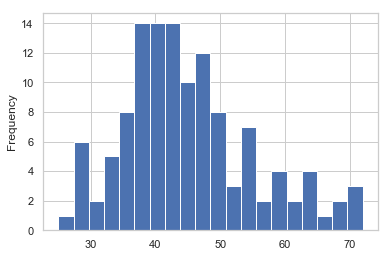

In [176]:
tas_df['TAS20'].plot.hist(by=None, bins=20)

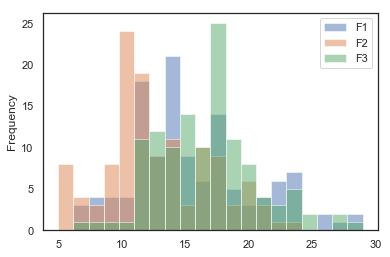

In [177]:
sns.set_style("white")
tas_df[['F1','F2','F3']].plot.hist(by=None, bins=20, alpha=0.5)

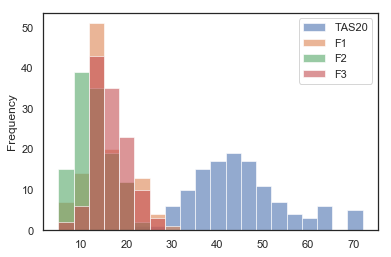

In [147]:
sns.set_style("white")
tas_df[['TAS20','F1','F2','F3']].plot.hist(by=None, bins=20, alpha=0.6)

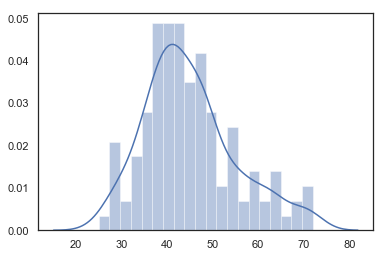

In [178]:
sns.distplot(tas_df[["TAS20"]], bins=20, kde=True)

### Normal distribution testing

In [187]:
# Normal distribution test
def normality(x, name, alpha=1e-3):
    k2, p = stats.normaltest(x)
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("The null hypothesis can be rejected. " + name + " is NOT a normal distribution.")
    else:
         print("The null hypothesis cannot be rejected. " + name + " IS a normal distribution.")

In [192]:
normality(tas_df["TAS20"], "TAS-20")
normality(tas_df["F1"], "F1")
normality(tas_df["F2"], "F2")
normality(tas_df["F3"], "F3")
normality(tas_df["Age"], "Age")
normality(tas_df["Tas20Time"], "RT")

p = 0.00956064
The null hypothesis cannot be rejected. TAS-20 IS a normal distribution.
p = 0.0346887
The null hypothesis cannot be rejected. F1 IS a normal distribution.
p = 0.100829
The null hypothesis cannot be rejected. F2 IS a normal distribution.
p = 0.0947657
The null hypothesis cannot be rejected. F3 IS a normal distribution.
p = 0.00213647
The null hypothesis cannot be rejected. Age IS a normal distribution.
p = 4.9316e-35
The null hypothesis can be rejected. RT is NOT a normal distribution.


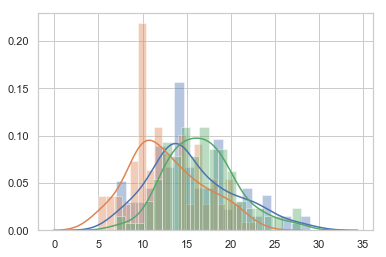

In [159]:
sns.distplot(tas_df[["F1"]], bins=20, kde=True)
sns.distplot(tas_df[["F2"]], bins=20, kde=True)
sns.distplot(tas_df[["F3"]], bins=20, kde=True)

### Difference of means testing

In [194]:
# One way ANOVA for F1, F2 and F3
from scipy.stats import f_oneway

stat, p = f_oneway(tas_df["F1"], tas_df["F2"], tas_df["F3"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=27.152, p=0.000
Different distributions (reject H0)


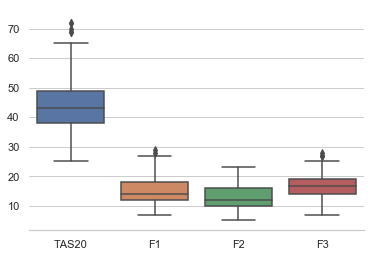

In [151]:
sns.set_style("whitegrid")
sns.boxplot(data=tas_df[["TAS20","F1","F2","F3"]], palette="deep")
sns.despine(left=True)

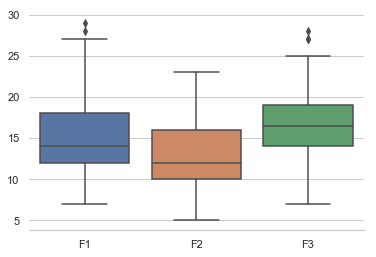

In [195]:
sns.set_style("whitegrid")
sns.boxplot(data=tas_df[["F1","F2","F3"]], palette="deep")
sns.despine(left=True)

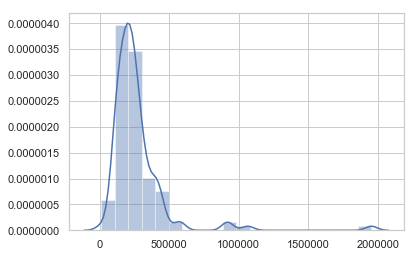

In [196]:
sns.distplot(tas_df[["Tas20Time"]], bins=20, kde=True)

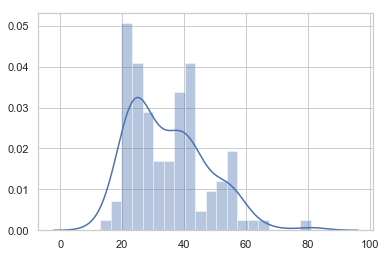

In [197]:
sns.distplot(tas_df[["Age"]], bins=20, kde=True)

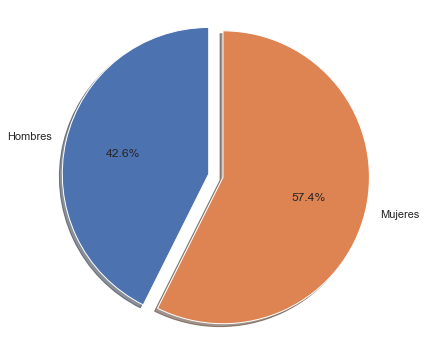

In [198]:
labels = 'Hombres', 'Mujeres'
sizes = [tas_df['Sex'].value_counts()[1], \
        tas_df['Sex'].value_counts()[2]]
explode = (0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [199]:
# Sex stats
tas_df["Sex"].describe()

count     122
unique      2
top         2
freq       70
Name: Sex, dtype: int64

In [200]:
# Sex stats
tas_df["Sex"].value_counts()

2    70
1    52
Name: Sex, dtype: int64

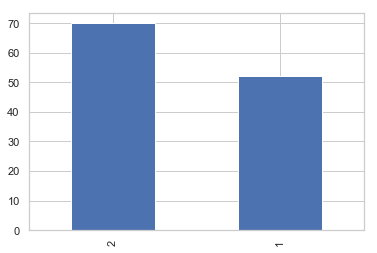

In [201]:
tas_df['Sex'].value_counts().plot(kind='bar')

In [202]:
# Gender stats
tas_df["Gender"].value_counts()

2    68
1    51
3     3
Name: Gender, dtype: int64

In [203]:
# Dominant hand stats
tas_df["Dhand"].value_counts()

1    114
2      5
3      3
Name: Dhand, dtype: int64

In [204]:
# Studies stats
tas_df["Studies"].value_counts()

5    57
6    44
7     8
4     6
3     5
2     1
1     1
Name: Studies, dtype: int64

In [205]:
# Social Class stats
tas_df["SClass"].value_counts()

2    112
3      7
1      3
Name: SClass, dtype: int64

In [206]:
# Siblings position stats
tas_df["SibPos"].value_counts()

1    50
2    43
3    19
4     5
5     4
8     1
Name: SibPos, dtype: int64

## Build categorical TAS variable
### Cutoff scoring: 

- Equal to or less than 51 = non-alexithymia.
- Scores of 52 to 60 = possible alexithymia.
- Equal to or greater than 61 = alexithymia. 

*Bagby, R. M., Parker, J. D. A. & Taylor, G. J. (1994). The twenty-item Toronto Alexithymia Scale-I. Item selection and cross-validation of the factor structure. Journal of Psychosomatic Research, 38, 23-32.*

**Other cutoff scorings can be considered:**

- Score less that 44 for non-alexithymia has been also considered. 
- Scores of 45 to 55 = possible alexithymia. 
- Equal to or greater than 56 = alexithymia. 

*Loas, G., Otmani, O., Fremaux, D., Lecercle, C., Duflot, M., & Delahousse, J. (1996). External validity, reliability and basic score determination of the Toronto Alexithymia Scales (TAS and TAS-20) in a group of alcoholic patients. L'Encephale, 22(1), 35-40.*


In [207]:
# Adding two new columns (TAS-20 categorical label)

tas_df.insert(loc=len(tas_df.columns), column='alex-a', value="") # Standard cutoff
tas_df.insert(loc=len(tas_df.columns), column='alex-b', value="") # Diagnosis validity maximized 


In [226]:
# tas_df.dtypes

In [209]:
# Define TAS-20 Diagnosis Labels
Label_NoAlex = "NoAlex"
Label_PossibleAlex = "PosAlex"
Label_Alex = "Alex"

In [210]:
# TAS-20 Score to Label according to Bagby et al. 
def getAlex_a_label(score):
    label = Label_NoAlex
    if score > 60:
        label = Label_Alex
    else:
        if score > 51:
            label = Label_PossibleAlex        
    return label

# TAS-20 Score to Label according to Loas et al. 
def getAlex_b_label(score):
    label = Label_NoAlex
    if score > 55:
        label = Label_Alex
    else:
        if score > 44:
            label = Label_PossibleAlex        
    return label

In [211]:
# Generate the labels: 

for index, row in tas_df.iterrows():
    tas_df.at[index, "alex-a"] = getAlex_a_label(row["TAS20"])
    tas_df.at[index, "alex-b"] = getAlex_b_label(row["TAS20"])


In [212]:
# Make sure they are considered categorical variables

tas_df['alex-a'] = pd.Categorical(tas_df['alex-a'])
tas_df['alex-b'] = pd.Categorical(tas_df['alex-b'])

In [225]:
# tas_df[["TAS20","alex-a","alex-b"]]

In [214]:
tas_df["alex-a"].value_counts()

NoAlex     97
PosAlex    13
Alex       12
Name: alex-a, dtype: int64

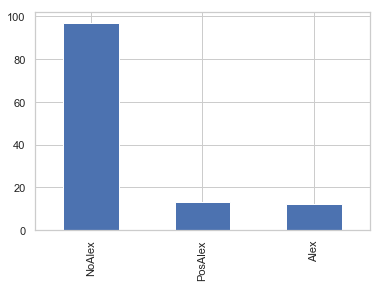

In [215]:
tas_df['alex-a'].value_counts().plot(kind='bar')

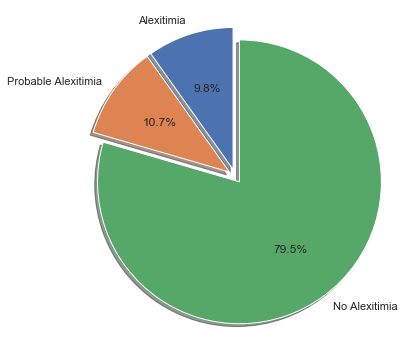

In [216]:
labels = 'Alexitimia', 'Probable Alexitimia', 'No Alexitimia'
sizes = [tas_df['alex-a'].value_counts()[Label_Alex], \
        tas_df['alex-a'].value_counts()[Label_PossibleAlex],
        tas_df['alex-a'].value_counts()[Label_NoAlex]]
explode = (0.05, 0.05, 0.05)

fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 
plt.show()

In [217]:
tas_df["alex-b"].value_counts()

NoAlex     66
PosAlex    38
Alex       18
Name: alex-b, dtype: int64

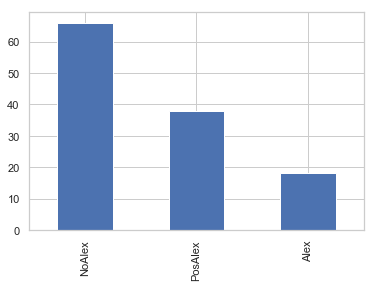

In [218]:
tas_df['alex-b'].value_counts().plot(kind='bar')

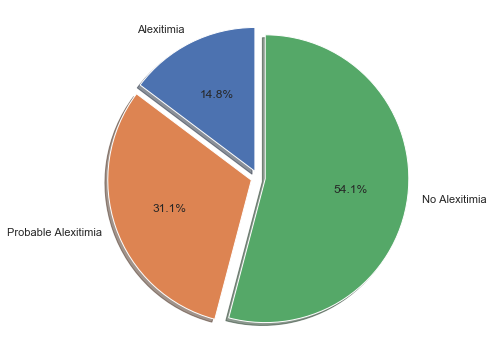

In [219]:
labels = 'Alexitimia', 'Probable Alexitimia', 'No Alexitimia'
sizes = [tas_df['alex-b'].value_counts()[Label_Alex], \
        tas_df['alex-b'].value_counts()[Label_PossibleAlex],
        tas_df['alex-b'].value_counts()[Label_NoAlex]]
explode = (0.05, 0.05, 0.05)

fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal') 
plt.show()

In [224]:
# tas_df

### Export CVS with TAS categorical variables

In [222]:
# tas_df = tas_df.drop(columns="Unnamed: 0");

In [223]:
# Dataset with categorical variables
new_tas_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-tas-1.2.csv"
tas_df.to_csv(new_tas_dataset_path, sep='\t', encoding='utf-8', index=False)

## Correlational Analysis

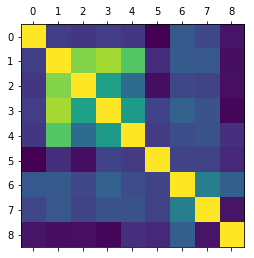

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(tas_df.corr())
plt.show()

In [40]:
corr = tas_df.corr()
corr

,NLP,TAS20,F1,F2,F3,Tas20Time,Age,Siblings,Rtime
NLP,1.000000,0.066014,0.038006,0.061428,0.040330,-0.145782,0.169436,0.098896,-0.080918
TAS20,0.066014,1.000000,0.788935,0.846683,0.696351,0.004348,0.180531,0.163907,-0.101568
F1,0.038006,0.788935,1.000000,0.509083,0.256164,-0.103901,0.096943,0.091169,-0.099544
F2,0.061428,0.846683,0.509083,1.000000,0.477980,0.084155,0.208367,0.146740,-0.130872
F3,0.040330,0.696351,0.256164,0.477980,1.000000,0.059130,0.124369,0.139824,0.007143
Tas20Time,-0.145782,0.004348,-0.103901,0.084155,0.059130,1.000000,0.083270,0.082187,-0.019205
Age,0.169436,0.180531,0.096943,0.208367,0.124369,0.083270,1.000000,0.345407,0.201828
Siblings,0.098896,0.163907,0.091169,0.146740,0.139824,0.082187,0.345407,1.000000,-0.083807
Rtime,-0.080918,-0.101568,-0.099544,-0.130872,0.007143,-0.019205,0.201828,-0.083807,1.000000


In [45]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,NLP,TAS20,F1,F2,F3,Tas20Time,Age,Siblings,Rtime
NLP,1,0.066,0.038,0.061,0.04,-0.15,0.17,0.099,-0.081
TAS20,0.066,1,0.79,0.85,0.7,0.0043,0.18,0.16,-0.1
F1,0.038,0.79,1,0.51,0.26,-0.1,0.097,0.091,-0.1
F2,0.061,0.85,0.51,1,0.48,0.084,0.21,0.15,-0.13
F3,0.04,0.7,0.26,0.48,1,0.059,0.12,0.14,0.0071
Tas20Time,-0.15,0.0043,-0.1,0.084,0.059,1,0.083,0.082,-0.019
Age,0.17,0.18,0.097,0.21,0.12,0.083,1,0.35,0.2
Siblings,0.099,0.16,0.091,0.15,0.14,0.082,0.35,1,-0.084
Rtime,-0.081,-0.1,-0.1,-0.13,0.0071,-0.019,0.2,-0.084,1


In [46]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

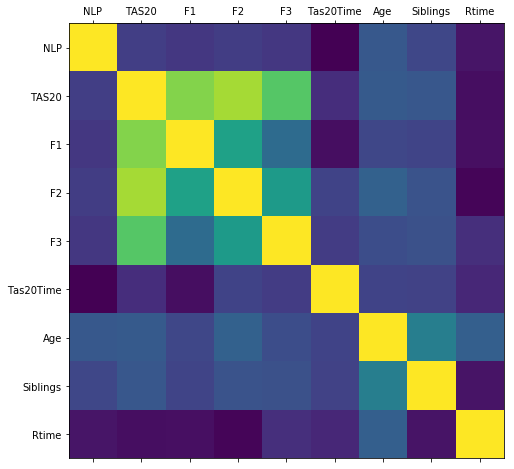

In [48]:
plot_corr(tas_df, 8)

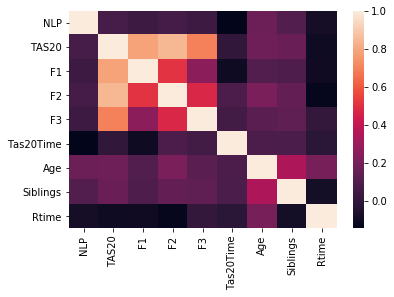

In [50]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

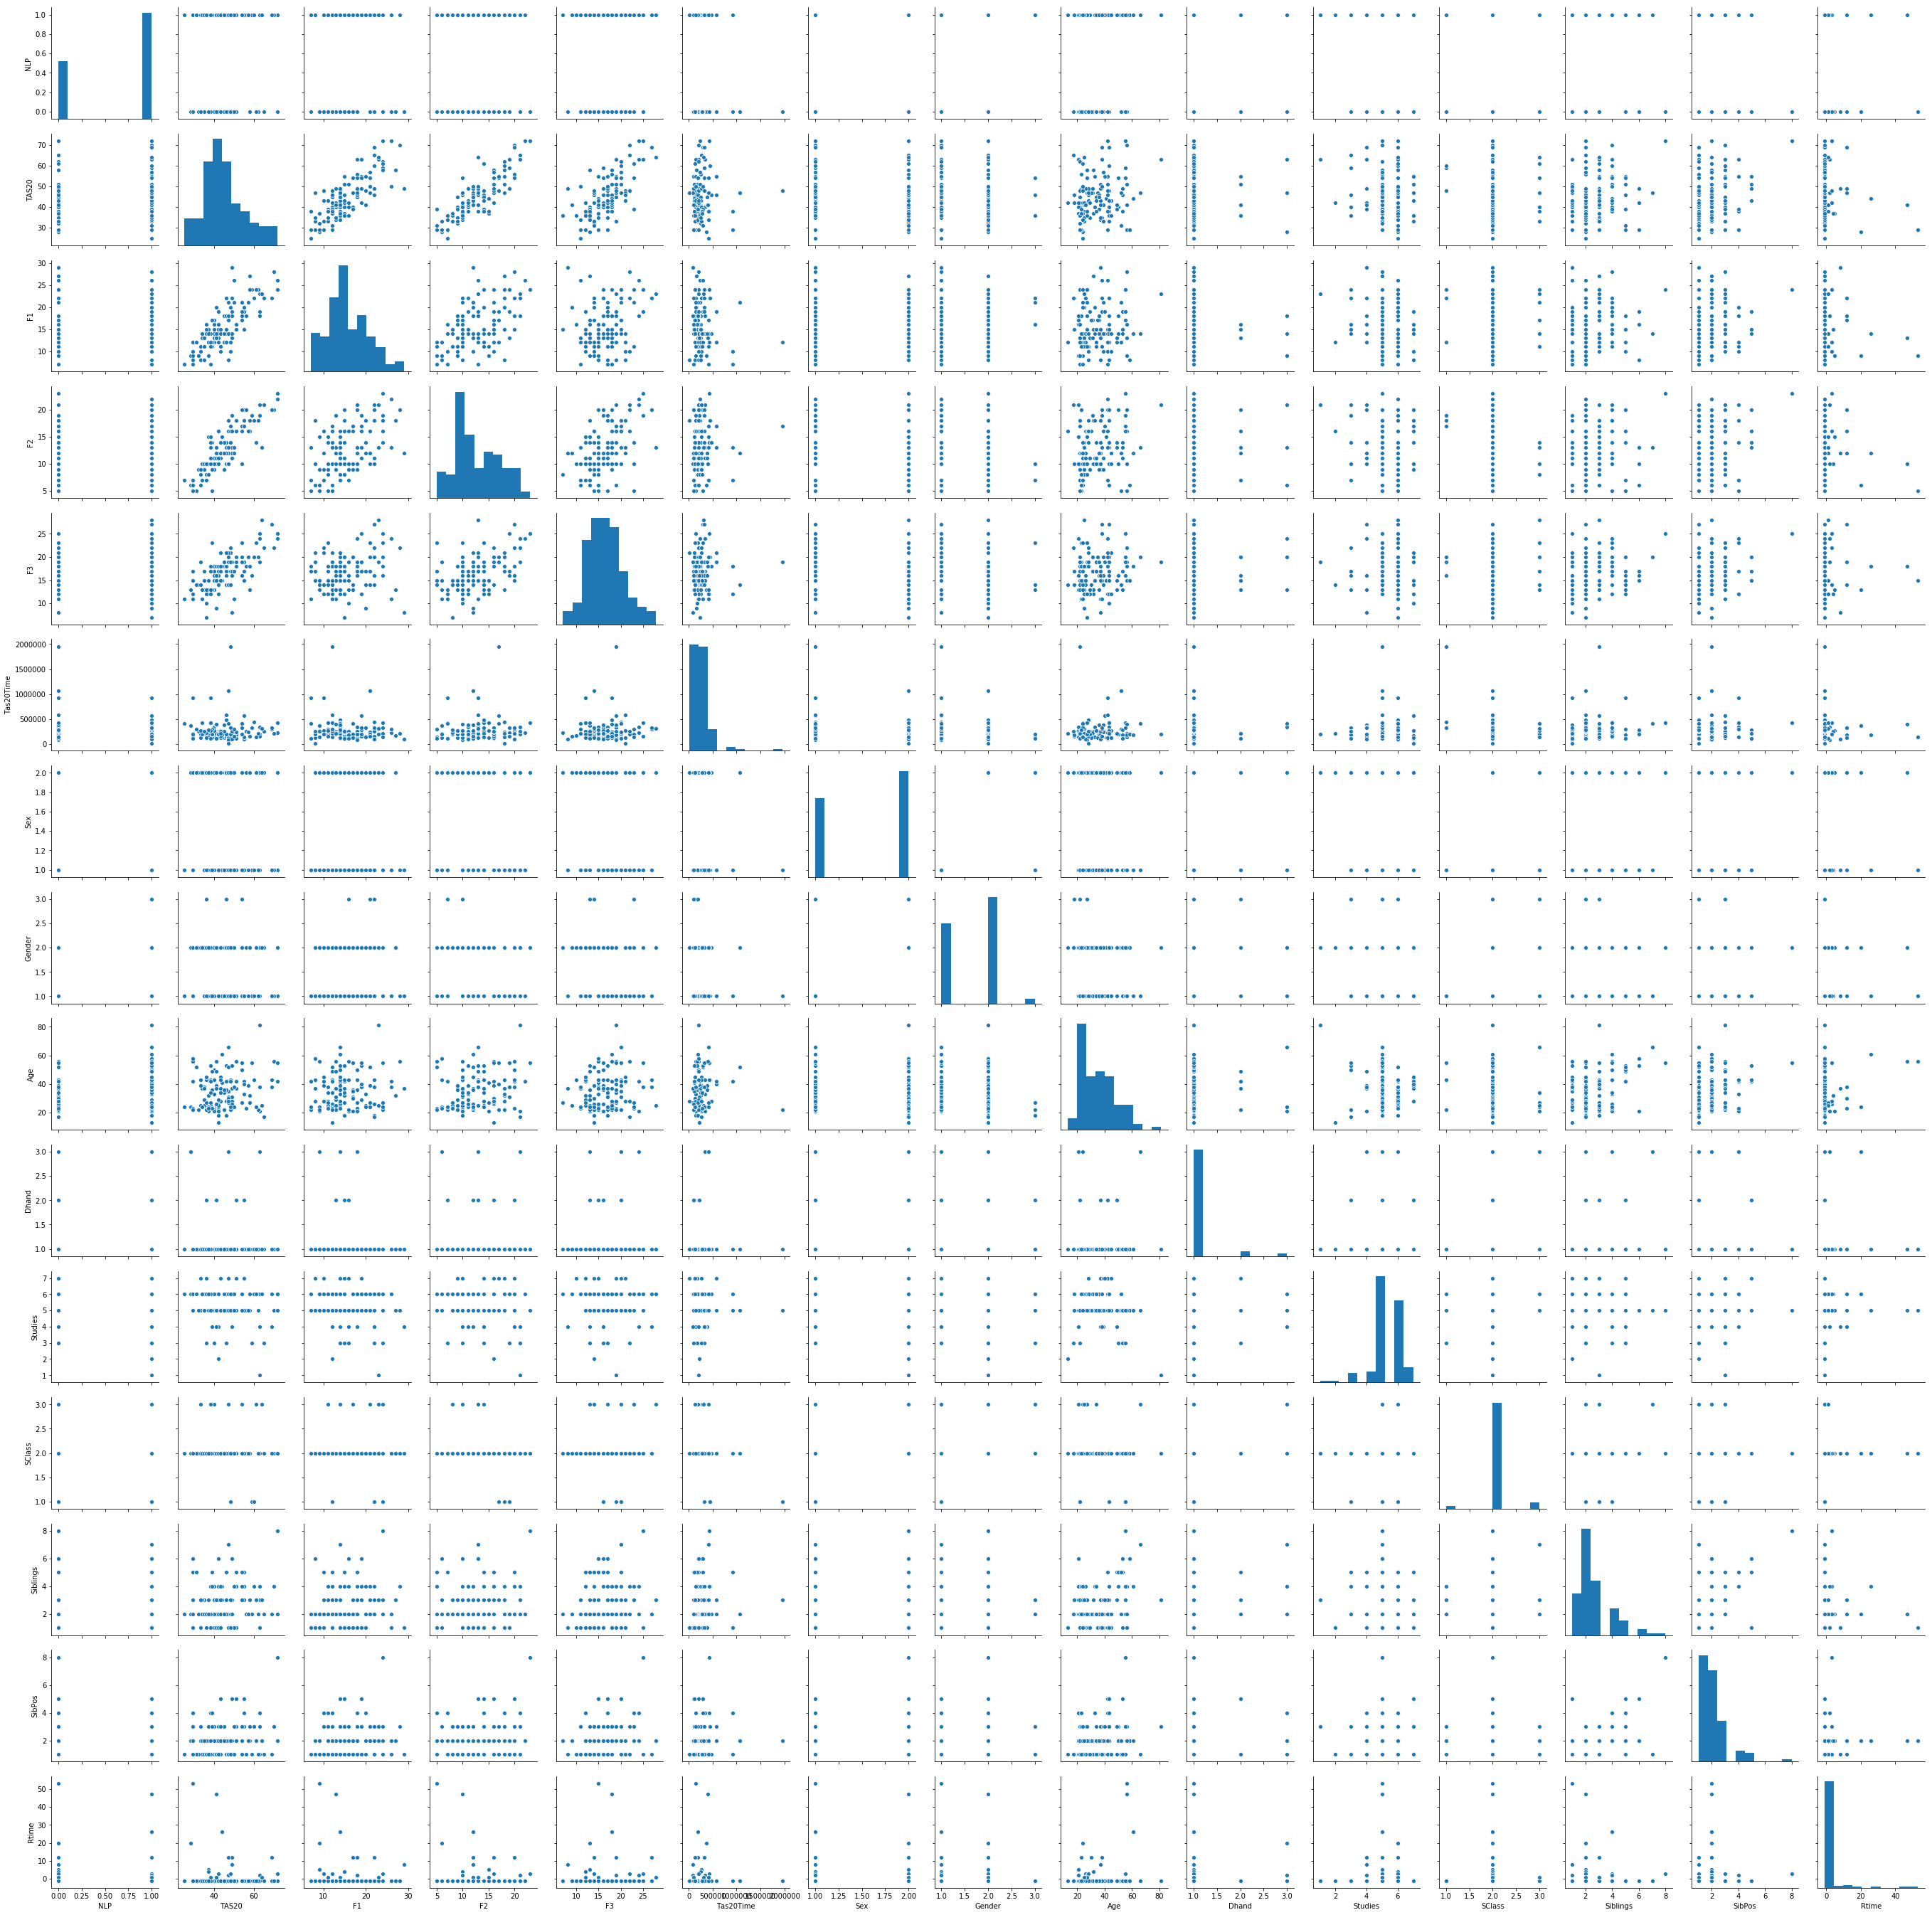

In [52]:
sns.pairplot(tas_df)

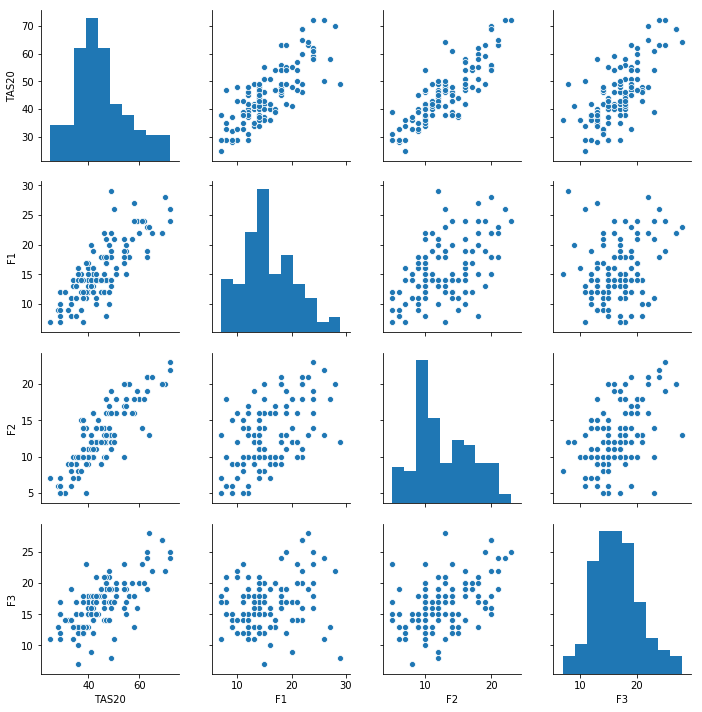

In [53]:
sns.pairplot(tas_df[["TAS20", "F1", "F2", "F3"]])

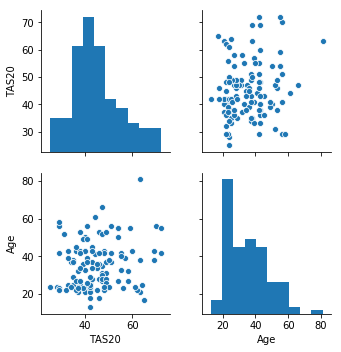

In [54]:
sns.pairplot(tas_df[["TAS20", "Age"]])

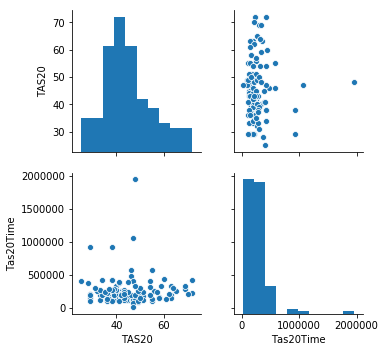

In [57]:
sns.pairplot(tas_df[["TAS20", "Tas20Time"]])

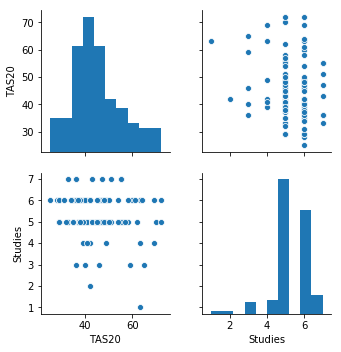

In [58]:
sns.pairplot(tas_df[["TAS20", "Studies"]])

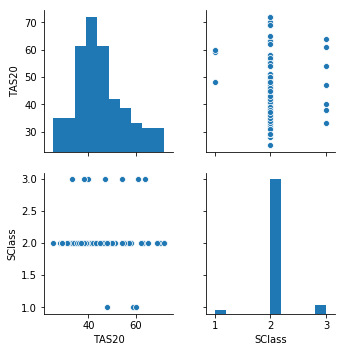

In [59]:
sns.pairplot(tas_df[["TAS20", "SClass"]])

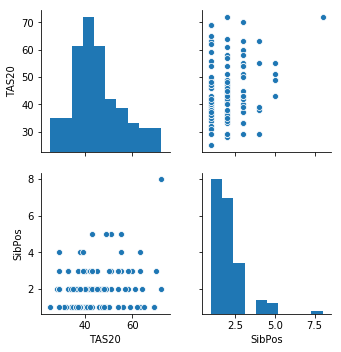

In [60]:
sns.pairplot(tas_df[["TAS20", "SibPos"]])

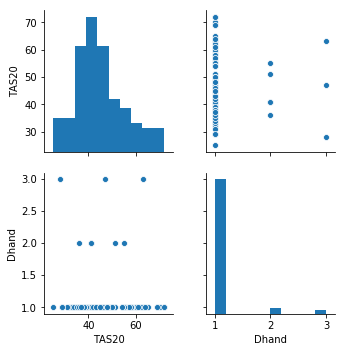

In [62]:
sns.pairplot(tas_df[["TAS20", "Dhand"]])